In [1]:
import os, sys
# repo root: one level up from this notebook
sys.path.insert(0, os.path.abspath(".."))

from engression_local import engression, Engressor
from engression_local.data.data_generator import preanm_generator, postanm_generator, generate_mats

# sanity check
import engression_local as pkg
print("Loaded from:", pkg.__file__)

Loaded from: /Users/seyonghw/Desktop/simulation/engression-python/engression_local/__init__.py


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1-dimensional case

In [9]:
A0, M0 = generate_mats(dx=1, dy=1, k=1, device=device)

In [10]:
A0, M0

(tensor([[-0.1642]]), tensor([[-0.4398]]))

In [11]:
x, y = preanm_generator(n=10000, dx=1, dy=1, k=1, true_function = "softplus", x_lower=0, x_upper=5, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=1, device=device)

In [12]:
x

tensor([[3.7882],
        [1.3966],
        [2.0153],
        ...,
        [2.1214],
        [0.4053],
        [3.9219]])

In [13]:
y

tensor([[-0.2219],
        [-0.2723],
        [-0.2259],
        ...,
        [-0.2334],
        [-0.2303],
        [-0.1902]])

In [27]:
x_eval = torch.linspace(0, 5, 300)
y_eval = M0* F.softplus(A0 * x_eval)

In [32]:
# Fit an engression model
engressor = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=500, batch_size=1000, device=device)

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.5128,  E(|Y-Yhat|): 0.9642,  E(|Yhat-Yhat'|): 0.9028
[Epoch 100 (20%), batch 9] energy-loss: 0.3240,  E(|Y-Yhat|): 0.6389,  E(|Yhat-Yhat'|): 0.6298
[Epoch 200 (40%), batch 9] energy-loss: 0.3222,  E(|Y-Yhat|): 0.6593,  E(|Yhat-Yhat'|): 0.6742
[Epoch 300 (60%), batch 9] energy-loss: 0.3172,  E(|Y-Yhat|): 0.6543,  E(|Yhat-Yhat'|): 0.6742
[Epoch 400 (80%), batch 9] energy-loss: 0.3214,  E(|Y-Yhat|): 0.6491,  E(|Yhat-Yhat'|): 0.6554
[Epoch 500 (100%), batch 9] energy-loss: 0.3266,  E(|Y-Yhat|): 0.6524,  E(|Yhat-Yhat'|): 0.6516

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.0008,  E(|Y-Yhat|): 0.0017,  E(|Yhat-Yhat'|): 0.0018

Predictio

In [33]:
# Predictions
y_pred = engressor.predict(x_eval, target="mean", sample_size=1000)

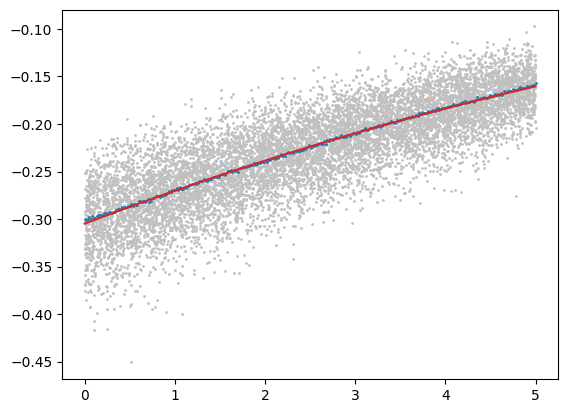

In [34]:

plt.scatter(x.cpu(), y.cpu(), label="training data", s=1, color="silver")
plt.plot(x_eval, y_eval[0], label="true function", color="C3")
plt.scatter(x_eval.cpu(), y_pred.cpu(), label="predictions", s=1)

# multi dimensional (X,Y in R^2)

In [35]:
A0, M0 = generate_mats(dx=2, dy=2, k=1, device=device)

In [36]:
A0, M0

(tensor([[1.2155, 0.3199]]),
 tensor([[0.0973],
         [1.3078]]))

In [37]:
x, y = preanm_generator(n=10000, dx=2, dy=2, k=1, true_function = "softplus", x_lower=0, x_upper=5, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=1, device=device)

In [38]:
x

tensor([[3.7882, 1.3966],
        [2.0153, 3.6734],
        [0.1464, 3.9993],
        ...,
        [1.2031, 0.1459],
        [3.2959, 2.3947],
        [1.3760, 2.7974]])

In [39]:
y

tensor([[0.2437, 3.2750],
        [0.5675, 7.6280],
        [0.1130, 1.5183],
        ...,
        [0.1511, 2.0306],
        [0.6579, 8.8423],
        [0.1171, 1.5740]])

In [42]:
x1 = torch.linspace(0, 5, 100)
x2 = torch.linspace(0, 5, 100)
X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)

In [58]:
x_eval[0:100,1]

tensor([0.0000, 0.0505, 0.1010, 0.1515, 0.2020, 0.2525, 0.3030, 0.3535, 0.4040,
        0.4545, 0.5051, 0.5556, 0.6061, 0.6566, 0.7071, 0.7576, 0.8081, 0.8586,
        0.9091, 0.9596, 1.0101, 1.0606, 1.1111, 1.1616, 1.2121, 1.2626, 1.3131,
        1.3636, 1.4141, 1.4646, 1.5152, 1.5657, 1.6162, 1.6667, 1.7172, 1.7677,
        1.8182, 1.8687, 1.9192, 1.9697, 2.0202, 2.0707, 2.1212, 2.1717, 2.2222,
        2.2727, 2.3232, 2.3737, 2.4242, 2.4747, 2.5253, 2.5758, 2.6263, 2.6768,
        2.7273, 2.7778, 2.8283, 2.8788, 2.9293, 2.9798, 3.0303, 3.0808, 3.1313,
        3.1818, 3.2323, 3.2828, 3.3333, 3.3838, 3.4343, 3.4848, 3.5354, 3.5859,
        3.6364, 3.6869, 3.7374, 3.7879, 3.8384, 3.8889, 3.9394, 3.9899, 4.0404,
        4.0909, 4.1414, 4.1919, 4.2424, 4.2929, 4.3434, 4.3939, 4.4444, 4.4949,
        4.5455, 4.5960, 4.6465, 4.6970, 4.7475, 4.7980, 4.8485, 4.8990, 4.9495,
        5.0000])

In [48]:
Z = x_eval @ A0.T            # (N*N, 1)
U = F.softplus(Z)        # (N*N, 1)
y_eval = U @ M0.T   

In [49]:
# Fit an engression model
engressor = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=500, batch_size=1000, device=device)

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.7660,  E(|Y-Yhat|): 1.3377,  E(|Yhat-Yhat'|): 1.1433
[Epoch 100 (20%), batch 9] energy-loss: 0.4504,  E(|Y-Yhat|): 0.9360,  E(|Yhat-Yhat'|): 0.9710
[Epoch 200 (40%), batch 9] energy-loss: 0.4493,  E(|Y-Yhat|): 0.9091,  E(|Yhat-Yhat'|): 0.9196
[Epoch 300 (60%), batch 9] energy-loss: 0.4413,  E(|Y-Yhat|): 0.8999,  E(|Yhat-Yhat'|): 0.9172
[Epoch 400 (80%), batch 9] energy-loss: 0.4522,  E(|Y-Yhat|): 0.9085,  E(|Yhat-Yhat'|): 0.9127
[Epoch 500 (100%), batch 9] energy-loss: 0.4460,  E(|Y-Yhat|): 0.9080,  E(|Yhat-Yhat'|): 0.9240

Training loss on the original (non-standardized) scale:
	Energy-loss: 2.3483,  E(|Y-Yhat|): 4.7436,  E(|Yhat-Yhat'|): 4.7906

Predictio

In [50]:
# Predictions
y_pred = engressor.predict(x_eval, target="mean", sample_size=1000)

In [51]:
y_pred

tensor([[0.0846, 1.1333],
        [0.0856, 1.1456],
        [0.0875, 1.1709],
        ...,
        [0.7326, 9.8468],
        [0.7310, 9.8243],
        [0.7375, 9.9125]])

In [72]:
torch.mean((y_pred - y_eval)**2)

tensor(0.0059)

# pre ANM, comparing 4 loss functions under different true fucntions ($X, Y \in R^1$)

## True function: softplus

In [17]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=1, dy=1, k=1, seed=i, device=device)
    x, y = preanm_generator(n=10000, dx=1, dy=1, k=1, true_function = "softplus", x_lower=0, x_upper=5, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x_eval = torch.linspace(0, 5, 100)
    y_eval = M0* F.softplus(A0 * x_eval)

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=500, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=500, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=500, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=500, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=500, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.5403,  E(|Y-Yhat|): 1.0034,  E(|Yhat-Yhat'|): 0.9263
[Epoch 100 (20%), batch 9] energy-loss: 0.3141,  E(|Y-Yhat|): 0.6437,  E(|Yhat-Yhat'|): 0.6593
[Epoch 200 (40%), batch 9] energy-loss: 0.3165,  E(|Y-Yhat|): 0.6451,  E(|Yhat-Yhat'|): 0.6572
[Epoch 300 (60%), batch 9] energy-loss: 0.3154,  E(|Y-Yhat|): 0.6344,  E(|Yhat-Yhat'|): 0.6380
[Epoch 400 (80%), batch 9] energy-loss: 0.3179,  E(|Y-Yhat|): 0.6400,  E(|Yhat-Yhat'|): 0.6440
[Epoch 500 (100%), batch 9] energy-loss: 0.3172,  E(|Y-Yhat|): 0.6365,  E(|Yhat-Yhat'|): 0.6387

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.1657,  E(|Y-Yhat|): 0.3315,  E(|Yhat-Yhat'|): 0.3316

Predictio

In [18]:
torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1))

(tensor(0.0001), tensor(0.0699))

In [16]:
torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

(tensor(0.0002), tensor(0.0002), tensor(0.0001))

## True function: cubic

In [30]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=1, dy=1, k=1, seed=i, device=device)
    x, y = preanm_generator(n=10000, dx=1, dy=1, k=1, true_function ="cubic", x_lower=-2, x_upper=2, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x_eval = torch.linspace(2, -2, 100)
    y_eval = M0* (A0 * x_eval)**3 / 3.0

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.4030,  E(|Y-Yhat|): 0.6842,  E(|Yhat-Yhat'|): 0.5625
[Epoch 100 (33%), batch 9] energy-loss: 0.3277,  E(|Y-Yhat|): 0.6421,  E(|Yhat-Yhat'|): 0.6289
[Epoch 200 (66%), batch 9] energy-loss: 0.3227,  E(|Y-Yhat|): 0.6392,  E(|Yhat-Yhat'|): 0.6331
[Epoch 300 (100%), batch 9] energy-loss: 0.3212,  E(|Y-Yhat|): 0.6420,  E(|Yhat-Yhat'|): 0.6417

Training loss on the original (non-standardized) scale:
	Energy-loss: 11.3009,  E(|Y-Yhat|): 21.4782,  E(|Yhat-Yhat'|): 20.3546

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on C

In [31]:
torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

(tensor(0.0682),
 tensor(28.4558),
 tensor(0.0986),
 tensor(0.1208),
 tensor(0.0536))

## True funcction: square

In [33]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=1, dy=1, k=1, seed=i, device=device)
    x, y = preanm_generator(n=10000, dx=1, dy=1, k=1, true_function ="square", x_lower=-2, x_upper=2, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x_eval = torch.linspace(2, -2, 100)
    y_eval = M0* (F.relu(A0 * x_eval))**2 / 2.0

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.4489,  E(|Y-Yhat|): 0.7774,  E(|Yhat-Yhat'|): 0.6570
[Epoch 100 (33%), batch 9] energy-loss: 0.2886,  E(|Y-Yhat|): 0.5680,  E(|Yhat-Yhat'|): 0.5589
[Epoch 200 (66%), batch 9] energy-loss: 0.2880,  E(|Y-Yhat|): 0.5767,  E(|Yhat-Yhat'|): 0.5773
[Epoch 300 (100%), batch 9] energy-loss: 0.2904,  E(|Y-Yhat|): 0.5743,  E(|Yhat-Yhat'|): 0.5677

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.4690,  E(|Y-Yhat|): 0.8881,  E(|Yhat-Yhat'|): 0.8382

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

In [34]:
torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

(tensor(0.0017),
 tensor(0.2515),
 tensor(0.0057),
 tensor(0.0022),
 tensor(0.0027))

## True function: log

In [35]:
def log_lin(z):
    return torch.where(
            z <= 2.0, z/3.0 + torch.log(torch.tensor(3.0, device=z.device)) - 2.0/3.0,
            torch.log(1.0 + z))

In [36]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=1, dy=1, k=1, seed=i, device=device)
    x, y = preanm_generator(n=10000, dx=1, dy=1, k=1, true_function ="log", x_lower=-2, x_upper=2, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x_eval = torch.linspace(2, -2, 100)
    y_eval = M0* (log_lin(A0 * x_eval))

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.5384,  E(|Y-Yhat|): 1.0097,  E(|Yhat-Yhat'|): 0.9426
[Epoch 100 (33%), batch 9] energy-loss: 0.3697,  E(|Y-Yhat|): 0.7463,  E(|Yhat-Yhat'|): 0.7533
[Epoch 200 (66%), batch 9] energy-loss: 0.3716,  E(|Y-Yhat|): 0.7563,  E(|Yhat-Yhat'|): 0.7695
[Epoch 300 (100%), batch 9] energy-loss: 0.3720,  E(|Y-Yhat|): 0.7569,  E(|Yhat-Yhat'|): 0.7698

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.0212,  E(|Y-Yhat|): 0.0423,  E(|Yhat-Yhat'|): 0.0422

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

In [37]:
torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

(tensor(0.0001),
 tensor(0.0044),
 tensor(0.0002),
 tensor(0.0002),
 tensor(0.0004))

# pre ANM, comparing 4 loss functions under different true fucntions ($X, Y \in R^2$)

## True function: softplus

In [39]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=1, seed=i, device=device)
    x, y = preanm_generator(n=10000, dx=2, dy=2, k=1, true_function = "softplus", x_lower=0, x_upper=5, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(0, 5, 100)
    x2 = torch.linspace(0, 5, 100)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = F.softplus(Z)   
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.7883,  E(|Y-Yhat|): 1.3785,  E(|Yhat-Yhat'|): 1.1804
[Epoch 100 (33%), batch 9] energy-loss: 0.4496,  E(|Y-Yhat|): 0.9141,  E(|Yhat-Yhat'|): 0.9290
[Epoch 200 (66%), batch 9] energy-loss: 0.4320,  E(|Y-Yhat|): 0.8860,  E(|Yhat-Yhat'|): 0.9080
[Epoch 300 (100%), batch 9] energy-loss: 0.4466,  E(|Y-Yhat|): 0.9004,  E(|Yhat-Yhat'|): 0.9077

Training loss on the original (non-standardized) scale:
	Energy-loss: 4.1871,  E(|Y-Yhat|): 8.5639,  E(|Yhat-Yhat'|): 8.7537

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

In [40]:
torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

(tensor(0.0019),
 tensor(2.4601),
 tensor(0.0037),
 tensor(0.0011),
 tensor(0.0011))

## True function: cubic

In [41]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=1, seed=i, device=device)
    x, y = preanm_generator(n=10000, dx=2, dy=2, k=1, true_function = "cubic", x_lower=-2, x_upper=2, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(-2, 2, 50)
    x2 = torch.linspace(-2, 2, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = Z ** 3 / 3.0   
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.5730,  E(|Y-Yhat|): 0.9264,  E(|Yhat-Yhat'|): 0.7068
[Epoch 100 (33%), batch 9] energy-loss: 0.4555,  E(|Y-Yhat|): 0.8951,  E(|Yhat-Yhat'|): 0.8792
[Epoch 200 (66%), batch 9] energy-loss: 0.4450,  E(|Y-Yhat|): 0.8938,  E(|Yhat-Yhat'|): 0.8976
[Epoch 300 (100%), batch 9] energy-loss: 0.4506,  E(|Y-Yhat|): 0.8974,  E(|Yhat-Yhat'|): 0.8936

Training loss on the original (non-standardized) scale:
	Energy-loss: 94.9253,  E(|Y-Yhat|): 181.5517,  E(|Yhat-Yhat'|): 173.2528

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on

In [42]:
torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

(tensor(0.0364),
 tensor(2.4757),
 tensor(0.0656),
 tensor(0.0483),
 tensor(0.0402))

## True function: square

In [44]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=1, seed=i, device=device)
    x, y = preanm_generator(n=10000, dx=2, dy=2, k=1, true_function = "square", x_lower=-2, x_upper=2, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(-2, 2, 50)
    x2 = torch.linspace(-2, 2, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = (F.relu(Z))**2 / 2.0
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.6203,  E(|Y-Yhat|): 0.9981,  E(|Yhat-Yhat'|): 0.7557
[Epoch 100 (33%), batch 9] energy-loss: 0.4045,  E(|Y-Yhat|): 0.8041,  E(|Yhat-Yhat'|): 0.7992
[Epoch 200 (66%), batch 9] energy-loss: 0.3873,  E(|Y-Yhat|): 0.8033,  E(|Yhat-Yhat'|): 0.8321
[Epoch 300 (100%), batch 9] energy-loss: 0.4031,  E(|Y-Yhat|): 0.8030,  E(|Yhat-Yhat'|): 0.7997

Training loss on the original (non-standardized) scale:
	Energy-loss: 7.2799,  E(|Y-Yhat|): 13.7437,  E(|Yhat-Yhat'|): 12.9277

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CP

In [45]:
torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

(tensor(0.0029),
 tensor(0.5823),
 tensor(0.0055),
 tensor(0.0039),
 tensor(0.0027))

## True function: log

In [46]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=1, seed=i, device=device)
    x, y = preanm_generator(n=10000, dx=2, dy=2, k=1, true_function = "log", x_lower=-2, x_upper=2, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(-2, 2, 50)
    x2 = torch.linspace(-2, 2, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = log_lin(Z)
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.7989,  E(|Y-Yhat|): 1.3761,  E(|Yhat-Yhat'|): 1.1545
[Epoch 100 (33%), batch 9] energy-loss: 0.5222,  E(|Y-Yhat|): 1.0686,  E(|Yhat-Yhat'|): 1.0929
[Epoch 200 (66%), batch 9] energy-loss: 0.5151,  E(|Y-Yhat|): 1.0574,  E(|Yhat-Yhat'|): 1.0846
[Epoch 300 (100%), batch 9] energy-loss: 0.5117,  E(|Y-Yhat|): 1.0437,  E(|Yhat-Yhat'|): 1.0639

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.6608,  E(|Y-Yhat|): 1.3340,  E(|Yhat-Yhat'|): 1.3464

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

In [47]:
torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

(tensor(0.0004),
 tensor(0.3281),
 tensor(0.0006),
 tensor(0.0005),
 tensor(0.0005))

# pre ANM, comparing 4 loss functions under different true fucntions ($X, Y \in R^2$, k=2)

## True function: softplus

In [48]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=2, seed=i, device=device)
    x, y = preanm_generator(n=10000, dx=2, dy=2, k=2, true_function = "softplus", x_lower=0, x_upper=5, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(0, 5, 50)
    x2 = torch.linspace(0, 5, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = F.softplus(Z)   
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.8071,  E(|Y-Yhat|): 1.3805,  E(|Yhat-Yhat'|): 1.1468
[Epoch 100 (33%), batch 9] energy-loss: 0.5766,  E(|Y-Yhat|): 1.1399,  E(|Yhat-Yhat'|): 1.1266
[Epoch 200 (66%), batch 9] energy-loss: 0.5530,  E(|Y-Yhat|): 1.1199,  E(|Yhat-Yhat'|): 1.1338
[Epoch 300 (100%), batch 9] energy-loss: 0.5545,  E(|Y-Yhat|): 1.1284,  E(|Yhat-Yhat'|): 1.1478

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.5321,  E(|Y-Yhat|): 1.0579,  E(|Yhat-Yhat'|): 1.0517

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

(tensor(0.0025),
 tensor(2.7211),
 tensor(0.0022),
 tensor(0.0027),
 tensor(0.0018))

## True function: cubic

In [49]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=2, seed=i, device=device)
    x, y = preanm_generator(n=10000, dx=2, dy=2, k=2, true_function = "cubic", x_lower=-2, x_upper=2, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(-2, 2, 50)
    x2 = torch.linspace(-2, 2, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = Z ** 3 / 3.0   
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.5660,  E(|Y-Yhat|): 0.9050,  E(|Yhat-Yhat'|): 0.6780
[Epoch 100 (33%), batch 9] energy-loss: 0.4496,  E(|Y-Yhat|): 0.8776,  E(|Yhat-Yhat'|): 0.8561
[Epoch 200 (66%), batch 9] energy-loss: 0.4370,  E(|Y-Yhat|): 0.8835,  E(|Yhat-Yhat'|): 0.8930
[Epoch 300 (100%), batch 9] energy-loss: 0.4471,  E(|Y-Yhat|): 0.8640,  E(|Yhat-Yhat'|): 0.8339

Training loss on the original (non-standardized) scale:
	Energy-loss: 128.6783,  E(|Y-Yhat|): 228.3666,  E(|Yhat-Yhat'|): 199.3766

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running o

(tensor(0.0642),
 tensor(31.3913),
 tensor(0.0843),
 tensor(0.0850),
 tensor(0.0765))

## True function: square

In [50]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=2, seed=i, device=device)
    x, y = preanm_generator(n=10000, dx=2, dy=2, k=2, true_function = "square", x_lower=-2, x_upper=2, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(-2, 2, 50)
    x2 = torch.linspace(-2, 2, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = (F.relu(Z))**2 / 2.0
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.6562,  E(|Y-Yhat|): 1.0828,  E(|Yhat-Yhat'|): 0.8533
[Epoch 100 (33%), batch 9] energy-loss: 0.5225,  E(|Y-Yhat|): 1.0249,  E(|Yhat-Yhat'|): 1.0049
[Epoch 200 (66%), batch 9] energy-loss: 0.5195,  E(|Y-Yhat|): 1.0183,  E(|Yhat-Yhat'|): 0.9975
[Epoch 300 (100%), batch 9] energy-loss: 0.5013,  E(|Y-Yhat|): 1.0047,  E(|Yhat-Yhat'|): 1.0067

Training loss on the original (non-standardized) scale:
	Energy-loss: 8.8141,  E(|Y-Yhat|): 17.5382,  E(|Yhat-Yhat'|): 17.4481

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CP

(tensor(0.0063),
 tensor(0.2031),
 tensor(0.0121),
 tensor(0.0075),
 tensor(0.0098))

## True function: log

In [51]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=2, seed=i, device=device)
    x, y = preanm_generator(n=10000, dx=2, dy=2, k=2, true_function = "log", x_lower=0, x_upper=5, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(0, 5, 50)
    x2 = torch.linspace(0, 5, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = log_lin(Z)
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.7654,  E(|Y-Yhat|): 1.3360,  E(|Yhat-Yhat'|): 1.1413
[Epoch 100 (33%), batch 9] energy-loss: 0.4566,  E(|Y-Yhat|): 0.9243,  E(|Yhat-Yhat'|): 0.9353
[Epoch 200 (66%), batch 9] energy-loss: 0.4562,  E(|Y-Yhat|): 0.9169,  E(|Yhat-Yhat'|): 0.9215
[Epoch 300 (100%), batch 9] energy-loss: 0.4587,  E(|Y-Yhat|): 0.9133,  E(|Yhat-Yhat'|): 0.9093

Training loss on the original (non-standardized) scale:
	Energy-loss: 0.1372,  E(|Y-Yhat|): 0.2813,  E(|Yhat-Yhat'|): 0.2883

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

(tensor(0.0005),
 tensor(0.2635),
 tensor(0.0004),
 tensor(0.0004),
 tensor(0.0004))

# post-ANM, comparing 4 loss functions under different true functions ($X,Y \in \mathbb{R}$)

## True function: softplus

In [52]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=1, dy=1, k=1, seed=i, device=device)
    x, y = postanm_generator(n=10000, dx=1, dy=1, k=1, true_function = "softplus", x_lower=0, x_upper=5, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x_eval = torch.linspace(0, 5, 100)
    y_eval = M0* F.softplus(A0 * x_eval)

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.5688,  E(|Y-Yhat|): 1.0008,  E(|Yhat-Yhat'|): 0.8639
[Epoch 100 (33%), batch 9] energy-loss: 0.4739,  E(|Y-Yhat|): 0.9768,  E(|Yhat-Yhat'|): 1.0058
[Epoch 200 (66%), batch 9] energy-loss: 0.4844,  E(|Y-Yhat|): 0.9898,  E(|Yhat-Yhat'|): 1.0108
[Epoch 300 (100%), batch 9] energy-loss: 0.4918,  E(|Y-Yhat|): 0.9864,  E(|Yhat-Yhat'|): 0.9892

Training loss on the original (non-standardized) scale:
	Energy-loss: 1.0399,  E(|Y-Yhat|): 2.0961,  E(|Yhat-Yhat'|): 2.1124

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

(tensor(0.0029),
 tensor(0.2679),
 tensor(0.0029),
 tensor(0.0029),
 tensor(0.0031))

## True function: cubic

In [53]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=1, dy=1, k=1, seed=i, device=device)
    x, y = postanm_generator(n=10000, dx=1, dy=1, k=1, true_function ="cubic", x_lower=-2, x_upper=2, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x_eval = torch.linspace(2, -2, 100)
    y_eval = M0* (A0 * x_eval)**3 / 3.0

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.5457,  E(|Y-Yhat|): 0.9791,  E(|Yhat-Yhat'|): 0.8668
[Epoch 100 (33%), batch 9] energy-loss: 0.3874,  E(|Y-Yhat|): 0.7792,  E(|Yhat-Yhat'|): 0.7837
[Epoch 200 (66%), batch 9] energy-loss: 0.3817,  E(|Y-Yhat|): 0.7770,  E(|Yhat-Yhat'|): 0.7905
[Epoch 300 (100%), batch 9] energy-loss: 0.3811,  E(|Y-Yhat|): 0.7802,  E(|Yhat-Yhat'|): 0.7981

Training loss on the original (non-standardized) scale:
	Energy-loss: 1.0456,  E(|Y-Yhat|): 2.2176,  E(|Yhat-Yhat'|): 2.3440

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

(tensor(0.0131),
 tensor(0.6991),
 tensor(0.0134),
 tensor(0.0143),
 tensor(0.0136))

## True function: square

In [54]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=1, dy=1, k=1, seed=i, device=device)
    x, y = postanm_generator(n=10000, dx=1, dy=1, k=1, true_function ="square", x_lower=-2, x_upper=2, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x_eval = torch.linspace(2, -2, 100)
    y_eval = M0* (F.relu(A0 * x_eval))**2 / 2.0

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.5813,  E(|Y-Yhat|): 1.0212,  E(|Yhat-Yhat'|): 0.8798
[Epoch 100 (33%), batch 9] energy-loss: 0.5240,  E(|Y-Yhat|): 1.0629,  E(|Yhat-Yhat'|): 1.0779
[Epoch 200 (66%), batch 9] energy-loss: 0.5278,  E(|Y-Yhat|): 1.0832,  E(|Yhat-Yhat'|): 1.1107
[Epoch 300 (100%), batch 9] energy-loss: 0.5341,  E(|Y-Yhat|): 1.0760,  E(|Yhat-Yhat'|): 1.0838

Training loss on the original (non-standardized) scale:
	Energy-loss: 1.0381,  E(|Y-Yhat|): 2.1034,  E(|Yhat-Yhat'|): 2.1305

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

(tensor(0.0027),
 tensor(1.1665),
 tensor(0.0038),
 tensor(0.0028),
 tensor(0.0036))

## True function: log

In [55]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=1, dy=1, k=1, seed=i, device=device)
    x, y = postanm_generator(n=10000, dx=1, dy=1, k=1, true_function ="log", x_lower=0, x_upper=5, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x_eval = torch.linspace(0, 5, 100)
    y_eval = M0* (log_lin(A0 * x_eval))

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.5907,  E(|Y-Yhat|): 1.0335,  E(|Yhat-Yhat'|): 0.8855
[Epoch 100 (33%), batch 9] energy-loss: 0.5597,  E(|Y-Yhat|): 1.1389,  E(|Yhat-Yhat'|): 1.1584
[Epoch 200 (66%), batch 9] energy-loss: 0.5594,  E(|Y-Yhat|): 1.1325,  E(|Yhat-Yhat'|): 1.1464
[Epoch 300 (100%), batch 9] energy-loss: 0.5661,  E(|Y-Yhat|): 1.1500,  E(|Yhat-Yhat'|): 1.1678

Training loss on the original (non-standardized) scale:
	Energy-loss: 1.0414,  E(|Y-Yhat|): 2.1613,  E(|Yhat-Yhat'|): 2.2399

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

(tensor(0.0026),
 tensor(0.3022),
 tensor(0.0033),
 tensor(0.0018),
 tensor(0.0030))

# post-ANM, comparing 4 loss functions under different true functions ($X,Y \in \mathbb{R}^2, k=1$)

## True function: softplus

In [56]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=1, seed=i, device=device)
    x, y = postanm_generator(n=10000, dx=2, dy=2, k=1, true_function = "softplus", x_lower=0, x_upper=5, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(0, 5, 50)
    x2 = torch.linspace(0, 5, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = F.softplus(Z)   
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.8328,  E(|Y-Yhat|): 1.4801,  E(|Yhat-Yhat'|): 1.2945
[Epoch 100 (33%), batch 9] energy-loss: 0.5141,  E(|Y-Yhat|): 1.0631,  E(|Yhat-Yhat'|): 1.0980
[Epoch 200 (66%), batch 9] energy-loss: 0.5194,  E(|Y-Yhat|): 1.0420,  E(|Yhat-Yhat'|): 1.0452
[Epoch 300 (100%), batch 9] energy-loss: 0.5245,  E(|Y-Yhat|): 1.0441,  E(|Yhat-Yhat'|): 1.0392

Training loss on the original (non-standardized) scale:
	Energy-loss: 2.0010,  E(|Y-Yhat|): 4.2091,  E(|Yhat-Yhat'|): 4.4162

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

(tensor(0.0031),
 tensor(0.4856),
 tensor(0.0042),
 tensor(0.0037),
 tensor(0.0045))

## True function: cubic

In [57]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=1, seed=i, device=device)
    x, y = postanm_generator(n=10000, dx=2, dy=2, k=1, true_function = "cubic", x_lower=-2, x_upper=2, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(-2, 2, 50)
    x2 = torch.linspace(-2, 2, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = Z ** 3 / 3.0   
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.8041,  E(|Y-Yhat|): 1.3949,  E(|Yhat-Yhat'|): 1.1817
[Epoch 100 (33%), batch 9] energy-loss: 0.5005,  E(|Y-Yhat|): 1.0155,  E(|Yhat-Yhat'|): 1.0298
[Epoch 200 (66%), batch 9] energy-loss: 0.4999,  E(|Y-Yhat|): 1.0221,  E(|Yhat-Yhat'|): 1.0443
[Epoch 300 (100%), batch 9] energy-loss: 0.5110,  E(|Y-Yhat|): 1.0250,  E(|Yhat-Yhat'|): 1.0282

Training loss on the original (non-standardized) scale:
	Energy-loss: 2.0290,  E(|Y-Yhat|): 4.3609,  E(|Yhat-Yhat'|): 4.6639

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

(tensor(0.0100),
 tensor(0.8455),
 tensor(0.0106),
 tensor(0.0104),
 tensor(0.0091))

## True function: square

In [58]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=1, seed=i, device=device)
    x, y = postanm_generator(n=10000, dx=2, dy=2, k=1, true_function = "square", x_lower=-2, x_upper=2, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(-2, 2, 50)
    x2 = torch.linspace(-2, 2, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = (F.relu(Z))**2 / 2.0
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.8602,  E(|Y-Yhat|): 1.5045,  E(|Yhat-Yhat'|): 1.2885
[Epoch 100 (33%), batch 9] energy-loss: 0.6757,  E(|Y-Yhat|): 1.3869,  E(|Yhat-Yhat'|): 1.4224
[Epoch 200 (66%), batch 9] energy-loss: 0.6746,  E(|Y-Yhat|): 1.3580,  E(|Yhat-Yhat'|): 1.3668
[Epoch 300 (100%), batch 9] energy-loss: 0.6723,  E(|Y-Yhat|): 1.3639,  E(|Yhat-Yhat'|): 1.3832

Training loss on the original (non-standardized) scale:
	Energy-loss: 2.0141,  E(|Y-Yhat|): 4.1601,  E(|Yhat-Yhat'|): 4.2920

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

(tensor(0.0038),
 tensor(0.6292),
 tensor(0.0048),
 tensor(0.0037),
 tensor(0.0048))

## True function: log

In [59]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=1, seed=i, device=device)
    x, y = postanm_generator(n=10000, dx=2, dy=2, k=1, true_function = "log", x_lower=0, x_upper=5, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(0, 5, 50)
    x2 = torch.linspace(0, 5, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = log_lin(Z)
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.8852,  E(|Y-Yhat|): 1.5405,  E(|Yhat-Yhat'|): 1.3106
[Epoch 100 (33%), batch 9] energy-loss: 0.7509,  E(|Y-Yhat|): 1.5202,  E(|Yhat-Yhat'|): 1.5387
[Epoch 200 (66%), batch 9] energy-loss: 0.7406,  E(|Y-Yhat|): 1.5293,  E(|Yhat-Yhat'|): 1.5774
[Epoch 300 (100%), batch 9] energy-loss: 0.7599,  E(|Y-Yhat|): 1.5124,  E(|Yhat-Yhat'|): 1.5050

Training loss on the original (non-standardized) scale:
	Energy-loss: 2.0352,  E(|Y-Yhat|): 4.1411,  E(|Yhat-Yhat'|): 4.2117

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

(tensor(0.0029),
 tensor(0.8703),
 tensor(0.0030),
 tensor(0.0029),
 tensor(0.0039))

# post-ANM, comparing 4 loss functions under different true functions ($X,Y \in \mathbb{R}^2, k=2$)

## True function: softplus

In [60]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=2, seed=i, device=device)
    x, y = postanm_generator(n=10000, dx=2, dy=2, k=2, true_function = "softplus", x_lower=0, x_upper=5, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(0, 5, 50)
    x2 = torch.linspace(0, 5, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = F.softplus(Z)   
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.8950,  E(|Y-Yhat|): 1.5617,  E(|Yhat-Yhat'|): 1.3335
[Epoch 100 (33%), batch 9] energy-loss: 0.7728,  E(|Y-Yhat|): 1.5735,  E(|Yhat-Yhat'|): 1.6015
[Epoch 200 (66%), batch 9] energy-loss: 0.7758,  E(|Y-Yhat|): 1.5767,  E(|Yhat-Yhat'|): 1.6019
[Epoch 300 (100%), batch 9] energy-loss: 0.7856,  E(|Y-Yhat|): 1.5556,  E(|Yhat-Yhat'|): 1.5400

Training loss on the original (non-standardized) scale:
	Energy-loss: 1.9781,  E(|Y-Yhat|): 4.0165,  E(|Yhat-Yhat'|): 4.0768

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

(tensor(0.0040),
 tensor(0.4596),
 tensor(0.0038),
 tensor(0.0037),
 tensor(0.0057))

## True function: cubic

In [61]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=2, seed=i, device=device)
    x, y = postanm_generator(n=10000, dx=2, dy=2, k=2, true_function = "cubic", x_lower=-2, x_upper=2, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(-2, 2, 50)
    x2 = torch.linspace(-2, 2, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = Z ** 3 / 3.0   
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.7107,  E(|Y-Yhat|): 1.2238,  E(|Yhat-Yhat'|): 1.0264
[Epoch 100 (33%), batch 9] energy-loss: 0.3219,  E(|Y-Yhat|): 0.6590,  E(|Yhat-Yhat'|): 0.6742
[Epoch 200 (66%), batch 9] energy-loss: 0.3154,  E(|Y-Yhat|): 0.6517,  E(|Yhat-Yhat'|): 0.6726
[Epoch 300 (100%), batch 9] energy-loss: 0.3224,  E(|Y-Yhat|): 0.6476,  E(|Yhat-Yhat'|): 0.6503

Training loss on the original (non-standardized) scale:
	Energy-loss: 2.0395,  E(|Y-Yhat|): 4.3613,  E(|Yhat-Yhat'|): 4.6435

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

(tensor(0.0173),
 tensor(2.2250),
 tensor(0.0196),
 tensor(0.0147),
 tensor(0.0160))

## True function: square

In [62]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=2, seed=i, device=device)
    x, y = postanm_generator(n=10000, dx=2, dy=2, k=2, true_function = "square", x_lower=-2, x_upper=2, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(-2, 2, 50)
    x2 = torch.linspace(-2, 2, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = (F.relu(Z))**2 / 2.0
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.8562,  E(|Y-Yhat|): 1.4788,  E(|Yhat-Yhat'|): 1.2453
[Epoch 100 (33%), batch 9] energy-loss: 0.6183,  E(|Y-Yhat|): 1.2648,  E(|Yhat-Yhat'|): 1.2930
[Epoch 200 (66%), batch 9] energy-loss: 0.6182,  E(|Y-Yhat|): 1.2456,  E(|Yhat-Yhat'|): 1.2547
[Epoch 300 (100%), batch 9] energy-loss: 0.6186,  E(|Y-Yhat|): 1.2529,  E(|Yhat-Yhat'|): 1.2687

Training loss on the original (non-standardized) scale:
	Energy-loss: 1.9978,  E(|Y-Yhat|): 4.1413,  E(|Yhat-Yhat'|): 4.2869

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

(tensor(0.0051),
 tensor(0.3044),
 tensor(0.0053),
 tensor(0.0045),
 tensor(0.0060))

## True function: log

In [63]:
MSE_power = []
MSE_power1 = []
MSE_exp = []
MSE_log1p = []
MSE_frac = []

for i in range(10):
    A0, M0 = generate_mats(dx=2, dy=2, k=2, seed=i, device=device)
    x, y = postanm_generator(n=10000, dx=2, dy=2, k=2, true_function = "log", x_lower=0, x_upper=5, noise_dist = "gaussian", noise_std=1, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(0, 5, 50)
    x2 = torch.linspace(0, 5, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = log_lin(Z)
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device)
    engressor_power1 = engression(x, y, lr=0.005, loss_phi="power", beta=1, num_epochs=300, batch_size=1000, device=device)
    engressor_exp = engression(x, y, lr=0.005, loss_phi="exp", num_epochs=300, batch_size=1000, device=device)
    engressor_log1p = engression(x, y, lr=0.005, loss_phi="log1p", num_epochs=300, batch_size=1000, device=device)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_power1 = engressor_power1.predict(x_eval, target="median", sample_size=1000)
    y_pred_exp = engressor_exp.predict(x_eval, target="median", sample_size=1000)
    y_pred_log1p = engressor_log1p.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_power1.append(torch.mean((y_pred_power1.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_exp.append(torch.mean((y_pred_exp.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_log1p.append(torch.mean((y_pred_log1p.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))

torch.mean(torch.stack(MSE_power)), torch.mean(torch.stack(MSE_power1)),torch.mean(torch.stack(MSE_exp)), torch.mean(torch.stack(MSE_log1p)), torch.mean(torch.stack(MSE_frac))

Running on CPU.

Data is standardized for training only; the printed training losses are on the standardized scale. 
However during evaluation, the predictions, evaluation metrics, and plots will be on the original scale.

Training based on mini-batch gradient descent with a batch size of 1000.
[Epoch 1 (0%), batch 9] energy-loss: 0.9025,  E(|Y-Yhat|): 1.5541,  E(|Yhat-Yhat'|): 1.3033
[Epoch 100 (33%), batch 9] energy-loss: 0.8446,  E(|Y-Yhat|): 1.6851,  E(|Yhat-Yhat'|): 1.6810
[Epoch 200 (66%), batch 9] energy-loss: 0.8336,  E(|Y-Yhat|): 1.6760,  E(|Yhat-Yhat'|): 1.6847
[Epoch 300 (100%), batch 9] energy-loss: 0.8472,  E(|Y-Yhat|): 1.6829,  E(|Yhat-Yhat'|): 1.6715

Training loss on the original (non-standardized) scale:
	Energy-loss: 2.0231,  E(|Y-Yhat|): 4.1163,  E(|Yhat-Yhat'|): 4.1864

Prediction-loss E(|Y-Yhat|) and variance-loss E(|Yhat-Yhat'|) should ideally be equally large
-- consider training for more epochs or adjusting hyperparameters if there is a mismatch 
Running on CPU.

(tensor(0.0031),
 tensor(1.4946),
 tensor(0.0029),
 tensor(0.0028),
 tensor(0.0038))

# Checking the robustness of frac energy loss

In [102]:
MSE_power = []
MSE_frac = []

for i in range(50):
    print(i)
    A0, M0 = generate_mats(dx=2, dy=2, k=2, seed=i, device=device)
    x, y = preanm_generator(n=10000, dx=2, dy=2, k=2, true_function = "cubic", x_lower=-2, x_upper=2, noise_dist = "uniform", noise_std=5, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(-2, 2, 50)
    x2 = torch.linspace(-2, 2, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = Z ** 3 / 3.0   
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device, verbose=False)
    engressor_frac = engression(x, y, lr=0.005, loss_phi="frac", num_epochs=300, batch_size=1000, device=device, verbose=False)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [96]:
import matplotlib.pyplot as plt

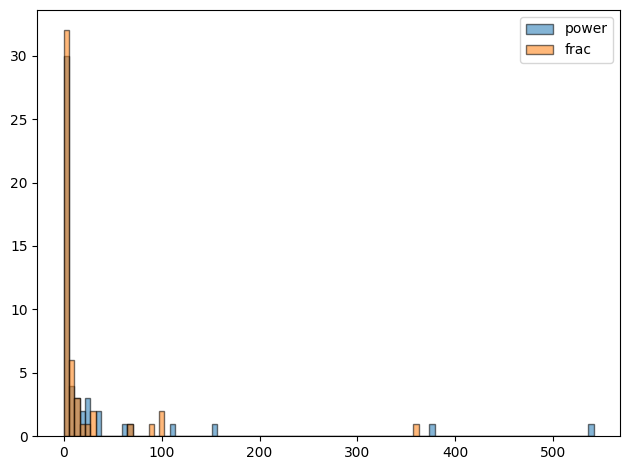

In [103]:
power_list = torch.stack(MSE_power).numpy()
frac_list = torch.stack(MSE_frac).numpy()

bins = np.linspace(min(power_list.min(), frac_list.min()), max(power_list.max(), frac_list.max()), 101)

plt.figure()
plt.hist(power_list, bins=bins, alpha=0.55, label='power', edgecolor='black')
plt.hist(frac_list, bins=bins, alpha=0.55, label='frac', edgecolor='black')
plt.legend()
plt.tight_layout()
plt.show()

In [106]:
MSE_power = []
MSE_frac = []

for i in range(50):
    print(i)
    A0, M0 = generate_mats(dx=2, dy=2, k=2, seed=i, device=device)
    x, y = preanm_generator(n=10000, dx=2, dy=2, k=2, true_function = "cubic", x_lower=-2, x_upper=2, noise_dist = "uniform", noise_std=5, A=A0, M=M0, seed=i, device=device)

    x1 = torch.linspace(-2, 2, 50)
    x2 = torch.linspace(-2, 2, 50)
    X1, X2 = torch.meshgrid(x1, x2, indexing='ij')
    x_eval = torch.stack([X1.reshape(-1), X2.reshape(-1)], dim=1)
    Z = x_eval @ A0.T       
    U = Z ** 3 / 3.0   
    y_eval = U @ M0.T   

    # Fit an engression model
    engressor_power = engression(x, y, lr=0.005, num_layer = 4, loss_phi="power", beta=0.5, num_epochs=300, batch_size=1000, device=device, verbose=False)
    engressor_frac = engression(x, y, lr=0.005, num_layer = 4, loss_phi="frac", num_epochs=300, batch_size=1000, device=device, verbose=False)

    # Predictions
    y_pred_power = engressor_power.predict(x_eval, target="median", sample_size=1000)
    y_pred_frac = engressor_frac.predict(x_eval, target="median", sample_size=1000)

    MSE_power.append(torch.mean((y_pred_power.reshape(-1) - y_eval.reshape(-1))**2))
    MSE_frac.append(torch.mean((y_pred_frac.reshape(-1) - y_eval.reshape(-1))**2))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


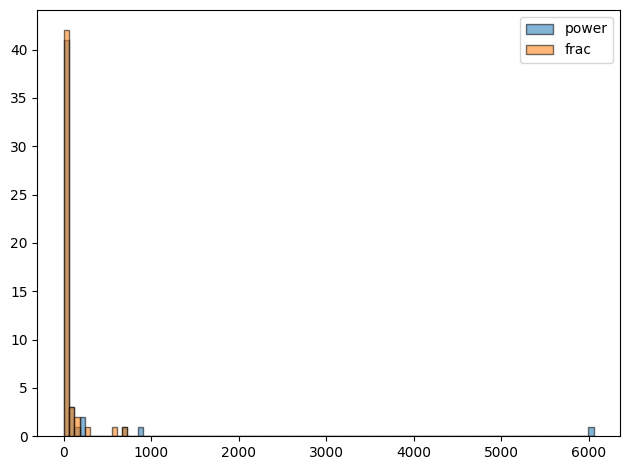

In [107]:
power_list = torch.stack(MSE_power).numpy()
frac_list = torch.stack(MSE_frac).numpy()

bins = np.linspace(min(power_list.min(), frac_list.min()), max(power_list.max(), frac_list.max()), 101)

plt.figure()
plt.hist(power_list, bins=bins, alpha=0.55, label='power', edgecolor='black')
plt.hist(frac_list, bins=bins, alpha=0.55, label='frac', edgecolor='black')
plt.legend()
plt.tight_layout()
plt.show()